In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import pandas as pd

In [ ]:
#Importing the dataset
df=pd.read_csv("/content/heart_failure_clinical_records_dataset.csv")
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [ ]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [ ]:
df.shape

(299, 13)

In [ ]:
import matplotlib as plt
import seaborn as sns

<Axes: >

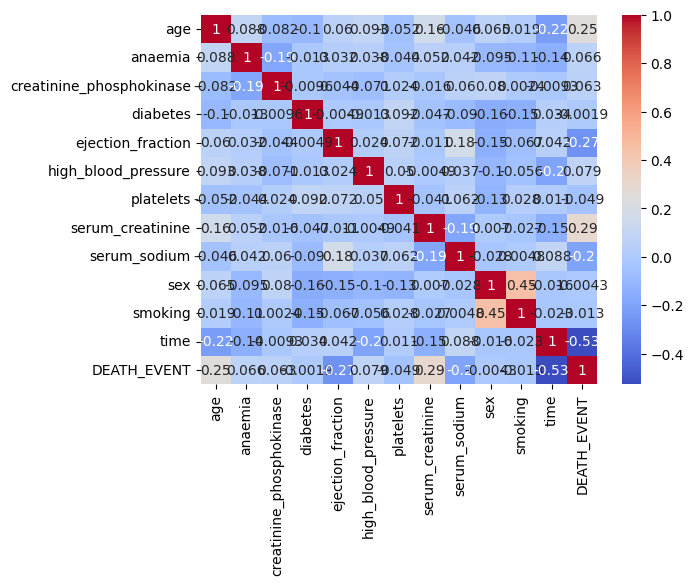

In [ ]:
corr_matrix=df.corr()
# Plot a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

In [ ]:
df.DEATH_EVENT.unique()
df.drop(["time","ejection_fraction","serum_sodium","platelets"],axis=1,inplace=True)
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,high_blood_pressure,serum_creatinine,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,1,1.9,1,0,1
1,55.0,0,7861,0,0,1.1,1,0,1
2,65.0,0,146,0,0,1.3,1,1,1
3,50.0,1,111,0,0,1.9,1,0,1
4,65.0,1,160,1,0,2.7,0,0,1


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

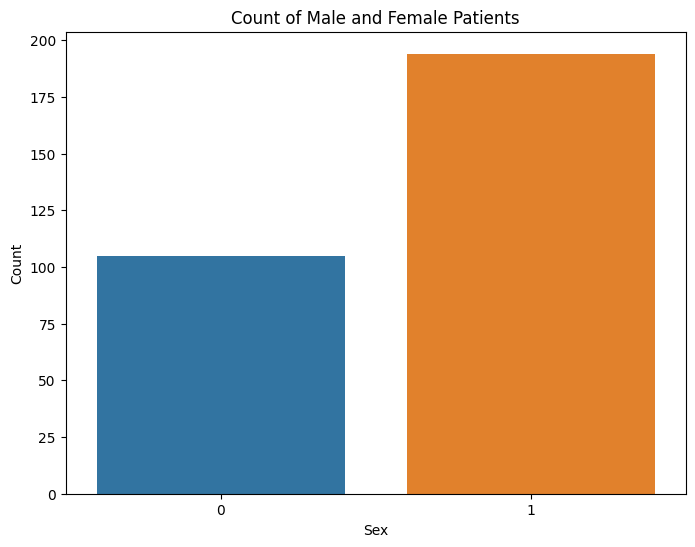

In [ ]:
# Visualizing the columns
# Example 1: Creating a bar plot for 'sex' column
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=df)
plt.title('Count of Male and Female Patients')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()


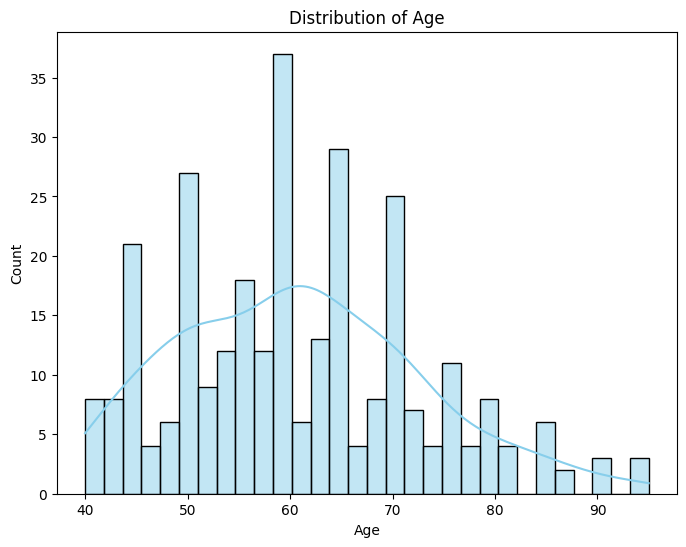

In [ ]:
# Example 2: Creating a histogram for the 'age' column
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='age', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

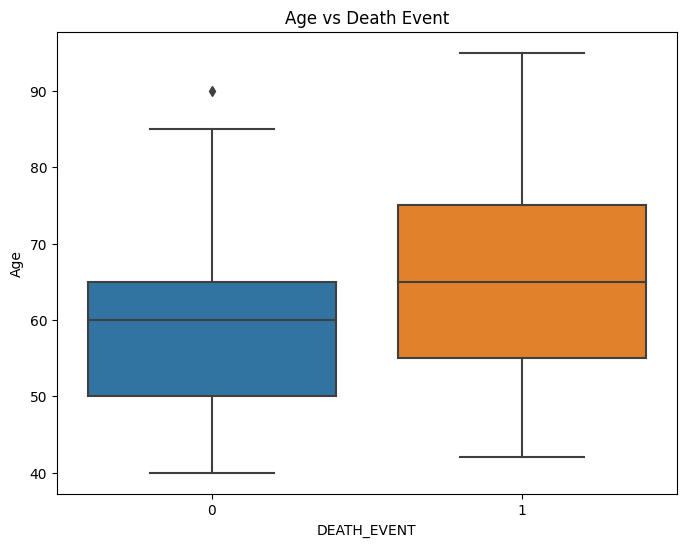

In [ ]:
# Example 3: Creating a box plot for 'DEATH_EVENT' column
plt.figure(figsize=(8, 6))
sns.boxplot(x='DEATH_EVENT', y='age', data=df)
plt.title('Age vs Death Event')
plt.xlabel('DEATH_EVENT')
plt.ylabel('Age')
plt.show()

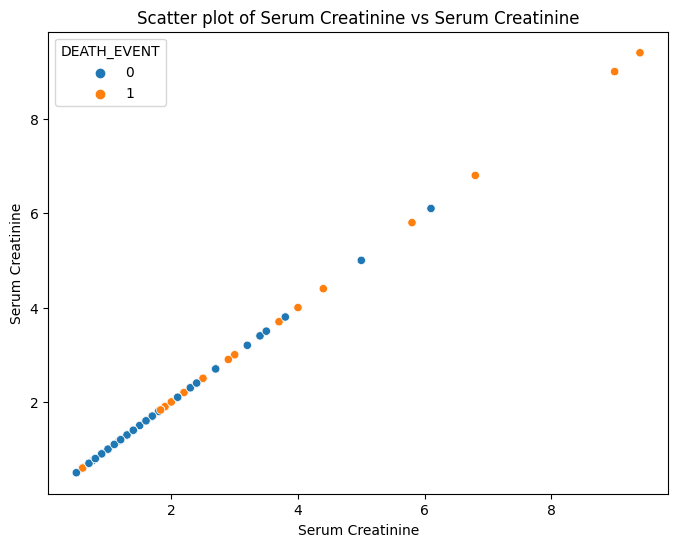

In [ ]:
# Example 4: Creating a scatter plot for 'serum_creatinine' and 'serum_sodium' columns
plt.figure(figsize=(8, 6))
sns.scatterplot(x='serum_creatinine', y='serum_creatinine', data=df, hue='DEATH_EVENT')
plt.title('Scatter plot of Serum Creatinine vs Serum Creatinine')
plt.xlabel('Serum Creatinine')
plt.ylabel('Serum Creatinine')
plt.show()

In [ ]:
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
print(X)
print(Y)

      age  anaemia  creatinine_phosphokinase  diabetes  high_blood_pressure  \
0    75.0        0                       582         0                    1   
1    55.0        0                      7861         0                    0   
2    65.0        0                       146         0                    0   
3    50.0        1                       111         0                    0   
4    65.0        1                       160         1                    0   
..    ...      ...                       ...       ...                  ...   
294  62.0        0                        61         1                    1   
295  55.0        0                      1820         0                    0   
296  45.0        0                      2060         1                    0   
297  45.0        0                      2413         0                    0   
298  50.0        0                       196         0                    0   

     serum_creatinine  sex  smoking  
0            

In [ ]:
#Scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X=sc.fit_transform(X)

In [ ]:
#splitting the dataset
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=2,test_size=0.2)

In [ ]:
#Using logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(Y_test,y_pred))

[[39  4]
 [12  5]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83        43
           1       0.56      0.29      0.38        17

    accuracy                           0.73        60
   macro avg       0.66      0.60      0.61        60
weighted avg       0.71      0.73      0.70        60



In [ ]:
from sklearn.svm import SVC
classifier=SVC(kernel='rbf')
classifier.fit(X_train,Y_train)
y_pred=classifier.predict(X_test)
print(classification_report(Y_test,y_pred))
print(confusion_matrix(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.75      0.93      0.83        43
           1       0.57      0.24      0.33        17

    accuracy                           0.73        60
   macro avg       0.66      0.58      0.58        60
weighted avg       0.70      0.73      0.69        60

[[40  3]
 [13  4]]
